In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anime

# Load data from GitHub directly
url = "https://raw.githubusercontent.com/Adrita-Khan/Astroinformatics/main/Basic%20Python%20Operations/Datasets/Skyserver_SQL12_4_2024%208_48_44%20AM.csv"



dataframe = pd.read_csv(url)

# Strip any leading/trailing spaces in the column names
dataframe.columns = dataframe.columns.str.strip()

# Check if the columns are loaded correctly
print(dataframe.columns)

# Inspect the first few rows to check the data
print(dataframe.head())

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'field', 'specobjid',
       'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')
          objid         ra       dec         u         g         r         i  \
0  1.237650e+18  94.503047  0.475851  18.96574  17.49392  16.80027  16.58460   
1  1.237650e+18  94.513355  0.566979  18.87810  17.18946  16.36462  16.03709   
2  1.237650e+18  94.597311  0.500819  18.80745  17.31809  17.08153  17.01195   
3  1.237650e+18  94.662293  0.559813  17.99740  16.56571  16.34072  16.27827   
4  1.237650e+18  94.538288  0.581611  19.44680  17.49869  16.64163  16.32379   

          z  field     specobjid class  redshift  plate    mjd  fiberid  
0  16.32055    357  1.417550e+18  STAR  0.000022   1259  52931      166  
1  15.80739    357  1.417560e+18  STAR  0.000102   1259  52931      171  
2  16.92199    358  1.417560e+18  STAR  0.000252   1259  52931      173  
3  16.17252    358  1.417550e+18  STAR  0.000177   1259  52931      1

In [11]:
# Check for missing values
missing_values = dataframe.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64


In [12]:
# Summary statistics for numerical columns
summary_stats = dataframe.describe()
print("Summary statistics:")
print(summary_stats)

Summary statistics:
              objid          ra         dec           u           g  \
count  5.000000e+02  500.000000  500.000000  500.000000  500.000000   
mean   1.237650e+18   94.432506    0.335606   17.597448   16.010471   
std    4.100102e+03    8.351291    0.692570    1.273885    1.261043   
min    1.237650e+18   55.021616   -1.106338   13.572930   11.696170   
25%    1.237650e+18   93.739747   -0.263596   16.688615   15.207905   
50%    1.237650e+18   96.187858    0.489906   17.756010   16.003155   
75%    1.237650e+18  100.837425    0.896610   18.667390   17.002817   
max    1.237650e+18  102.479093    1.424553   19.586610   19.923930   

                r           i           z       field     specobjid  \
count  500.000000  500.000000  500.000000  500.000000  5.000000e+02   
mean    15.354531   15.176777   14.828266  301.852000  5.393905e+18   
std      1.413309    1.452376    1.435416  148.466045  3.227946e+18   
min     11.277090   11.088210   11.589860   26.000000  8

In [13]:
# Check data types of the columns
data_types = dataframe.dtypes
print("Data types of each column:")
print(data_types)


Data types of each column:
objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object


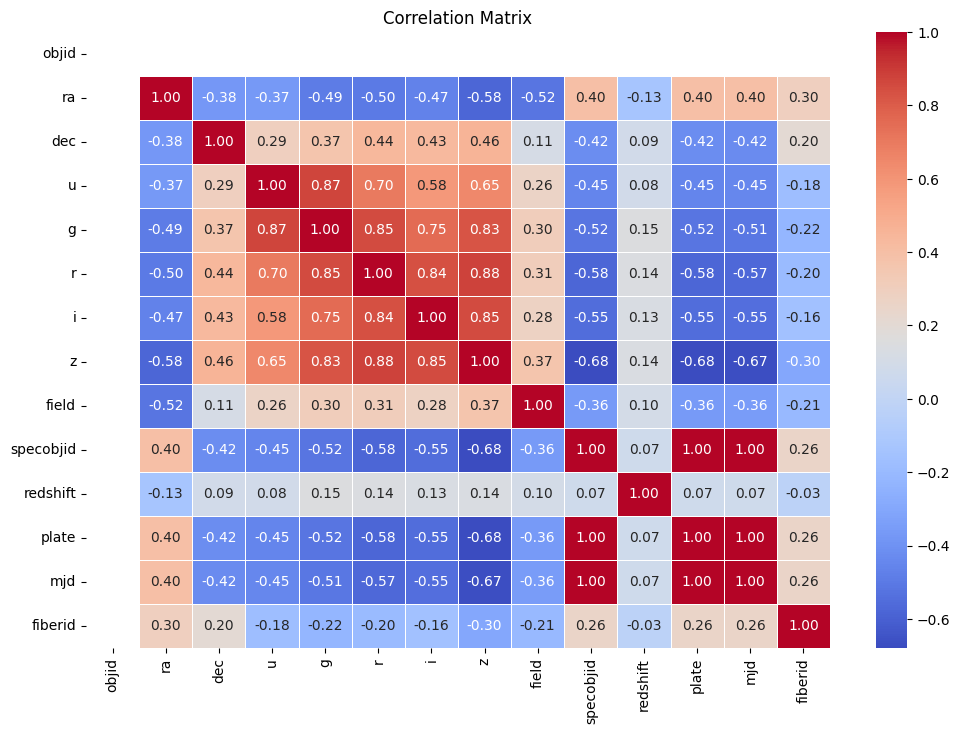

In [16]:
# Select only the numeric columns
numeric_df = dataframe.select_dtypes(include=[np.number])

# Calculate the correlation matrix on the numeric columns
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


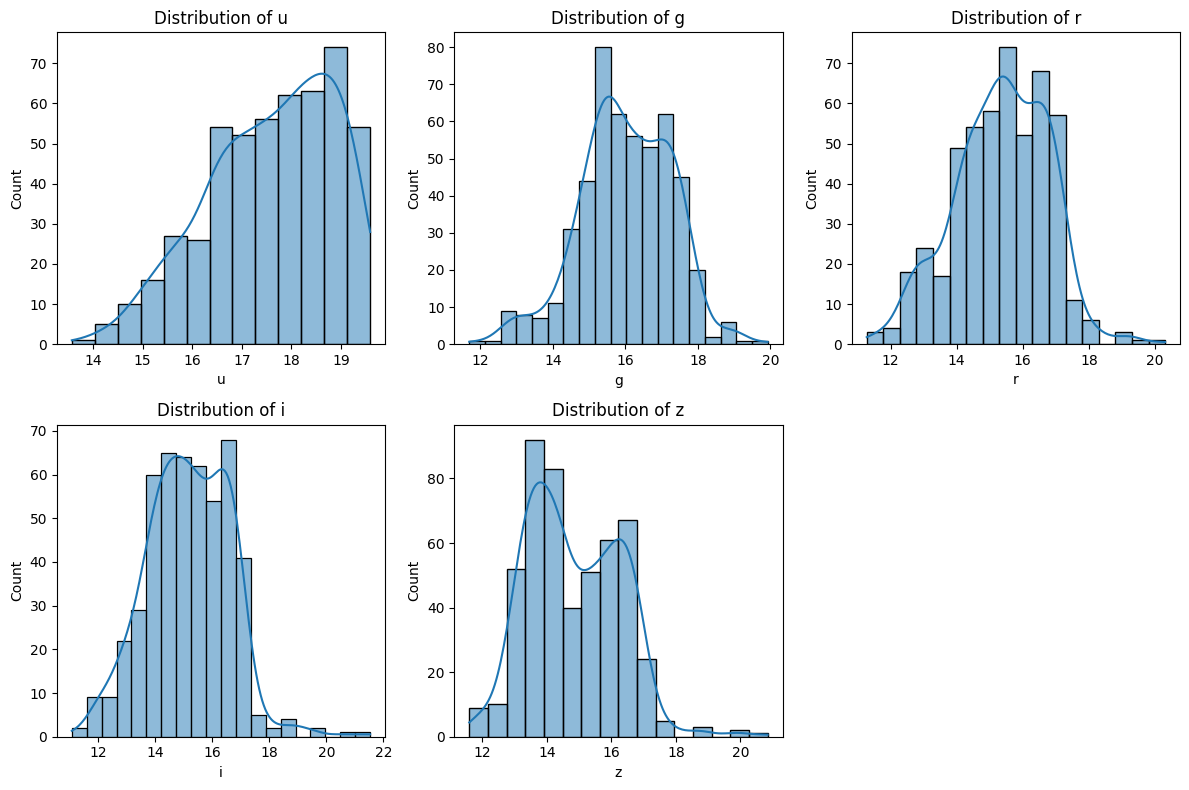

In [15]:
# Plot the distribution of magnitude columns
magnitude_columns = ['u', 'g', 'r', 'i', 'z']

plt.figure(figsize=(12, 8))
for i, col in enumerate(magnitude_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(dataframe[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


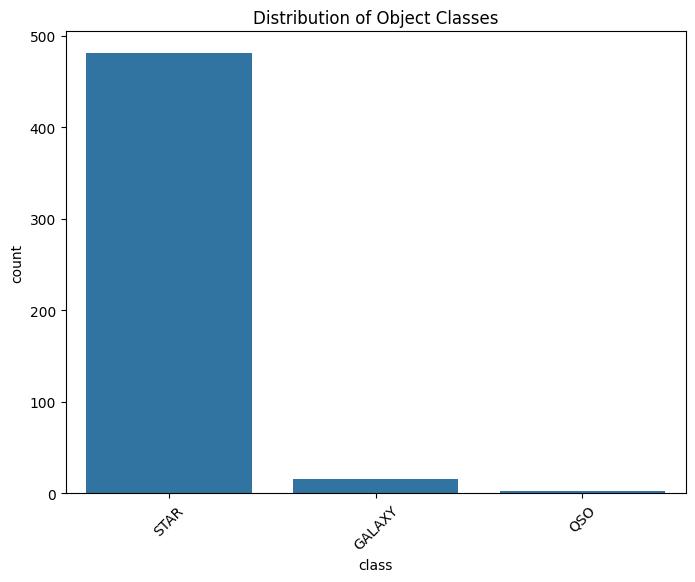

In [17]:
# Plot the distribution of the 'class' column
plt.figure(figsize=(8, 6))
sns.countplot(data=dataframe, x='class')
plt.title('Distribution of Object Classes')
plt.xticks(rotation=45)
plt.show()


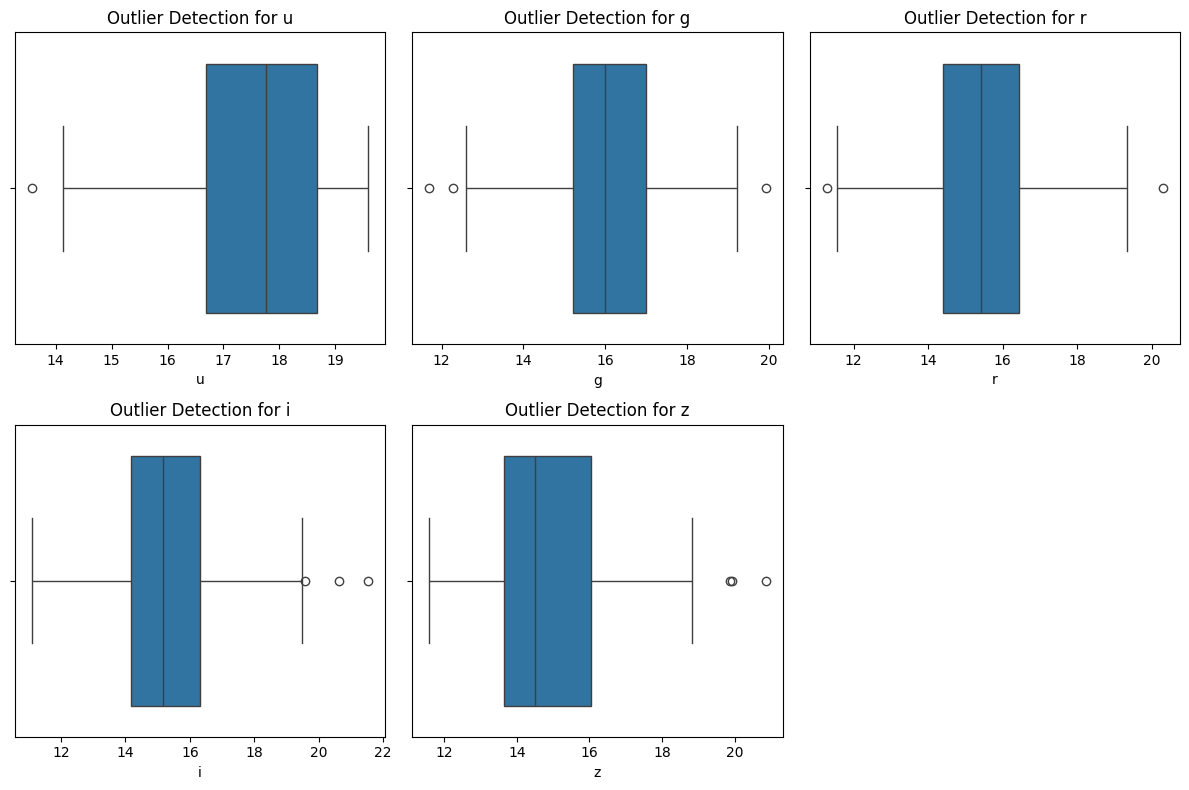

In [18]:
# Plot boxplots for magnitude columns to detect outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(magnitude_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=dataframe, x=col)
    plt.title(f'Outlier Detection for {col}')
plt.tight_layout()
plt.show()


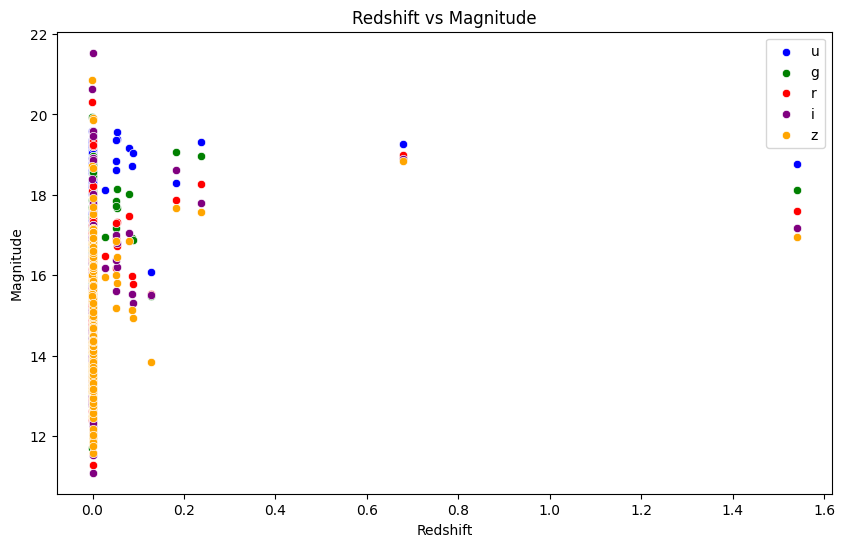

In [19]:
# Scatter plot to investigate redshift vs magnitudes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x='redshift', y='u', color='blue', label='u')
sns.scatterplot(data=dataframe, x='redshift', y='g', color='green', label='g')
sns.scatterplot(data=dataframe, x='redshift', y='r', color='red', label='r')
sns.scatterplot(data=dataframe, x='redshift', y='i', color='purple', label='i')
sns.scatterplot(data=dataframe, x='redshift', y='z', color='orange', label='z')
plt.legend()
plt.title('Redshift vs Magnitude')
plt.xlabel('Redshift')
plt.ylabel('Magnitude')
plt.show()


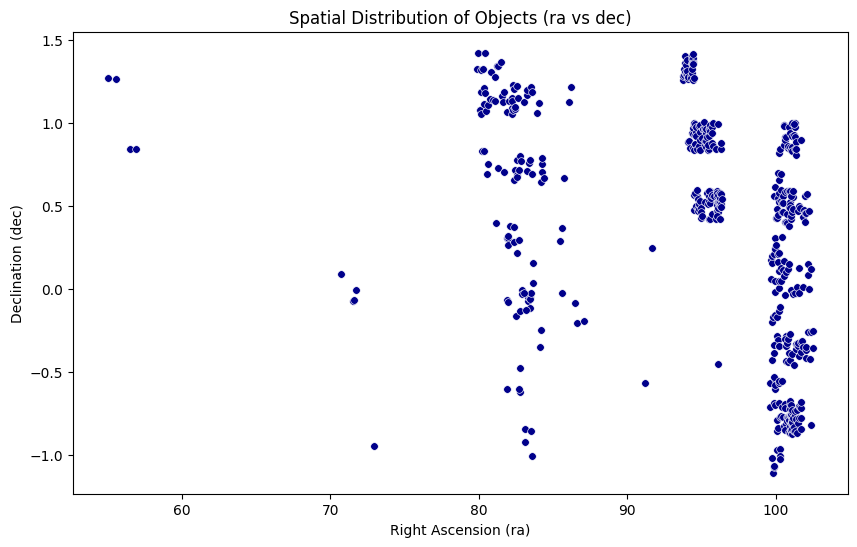

In [20]:
# Scatter plot for spatial distribution (ra vs dec)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x='ra', y='dec', color='darkblue', s=30)
plt.title('Spatial Distribution of Objects (ra vs dec)')
plt.xlabel('Right Ascension (ra)')
plt.ylabel('Declination (dec)')
plt.show()


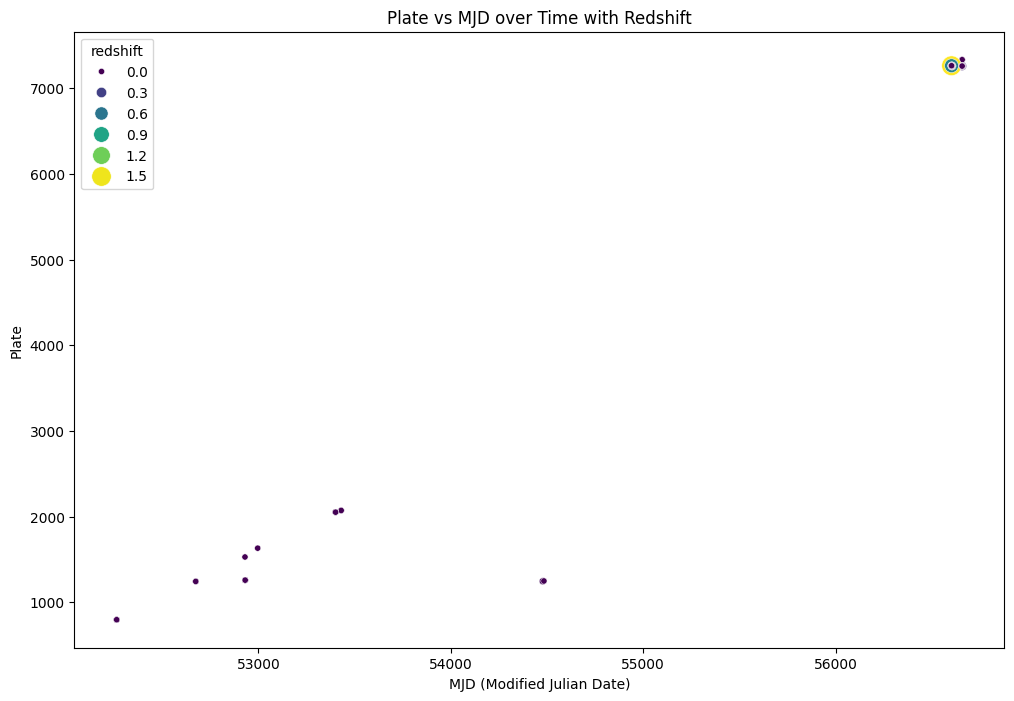

In [21]:
# Plot time evolution of observations based on 'plate' and 'mjd'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=dataframe, x='mjd', y='plate', hue='redshift', palette='viridis', size='redshift', sizes=(20, 200))
plt.title('Plate vs MJD over Time with Redshift')
plt.xlabel('MJD (Modified Julian Date)')
plt.ylabel('Plate')
plt.show()


In [22]:
# Check for extreme outliers in redshift
outliers_redshift = dataframe[dataframe['redshift'] > 1]  # Redshift values should usually be small (cosmologically speaking)
print(outliers_redshift[['objid', 'ra', 'dec', 'redshift']])


            objid         ra       dec  redshift
176  1.237650e+18  80.335584  1.214414  1.539758


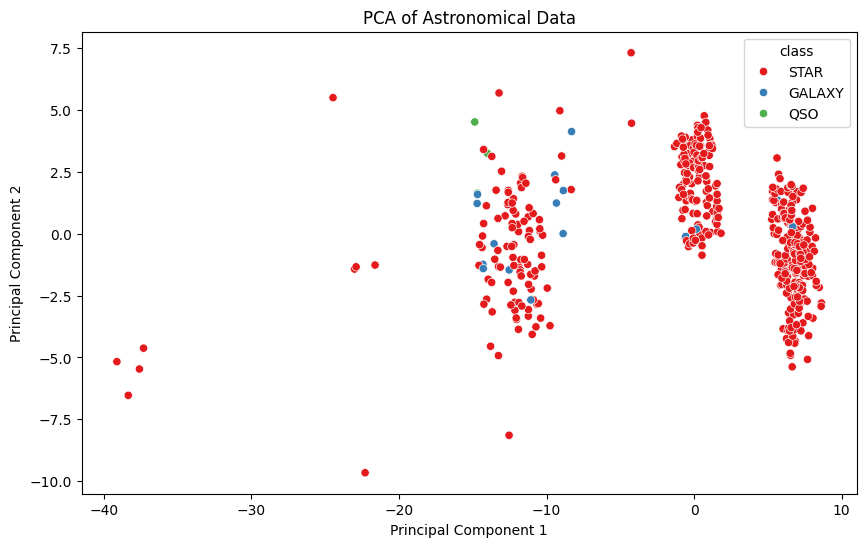

In [23]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dataframe[['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']])

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=dataframe['class'], palette='Set1')
plt.title('PCA of Astronomical Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


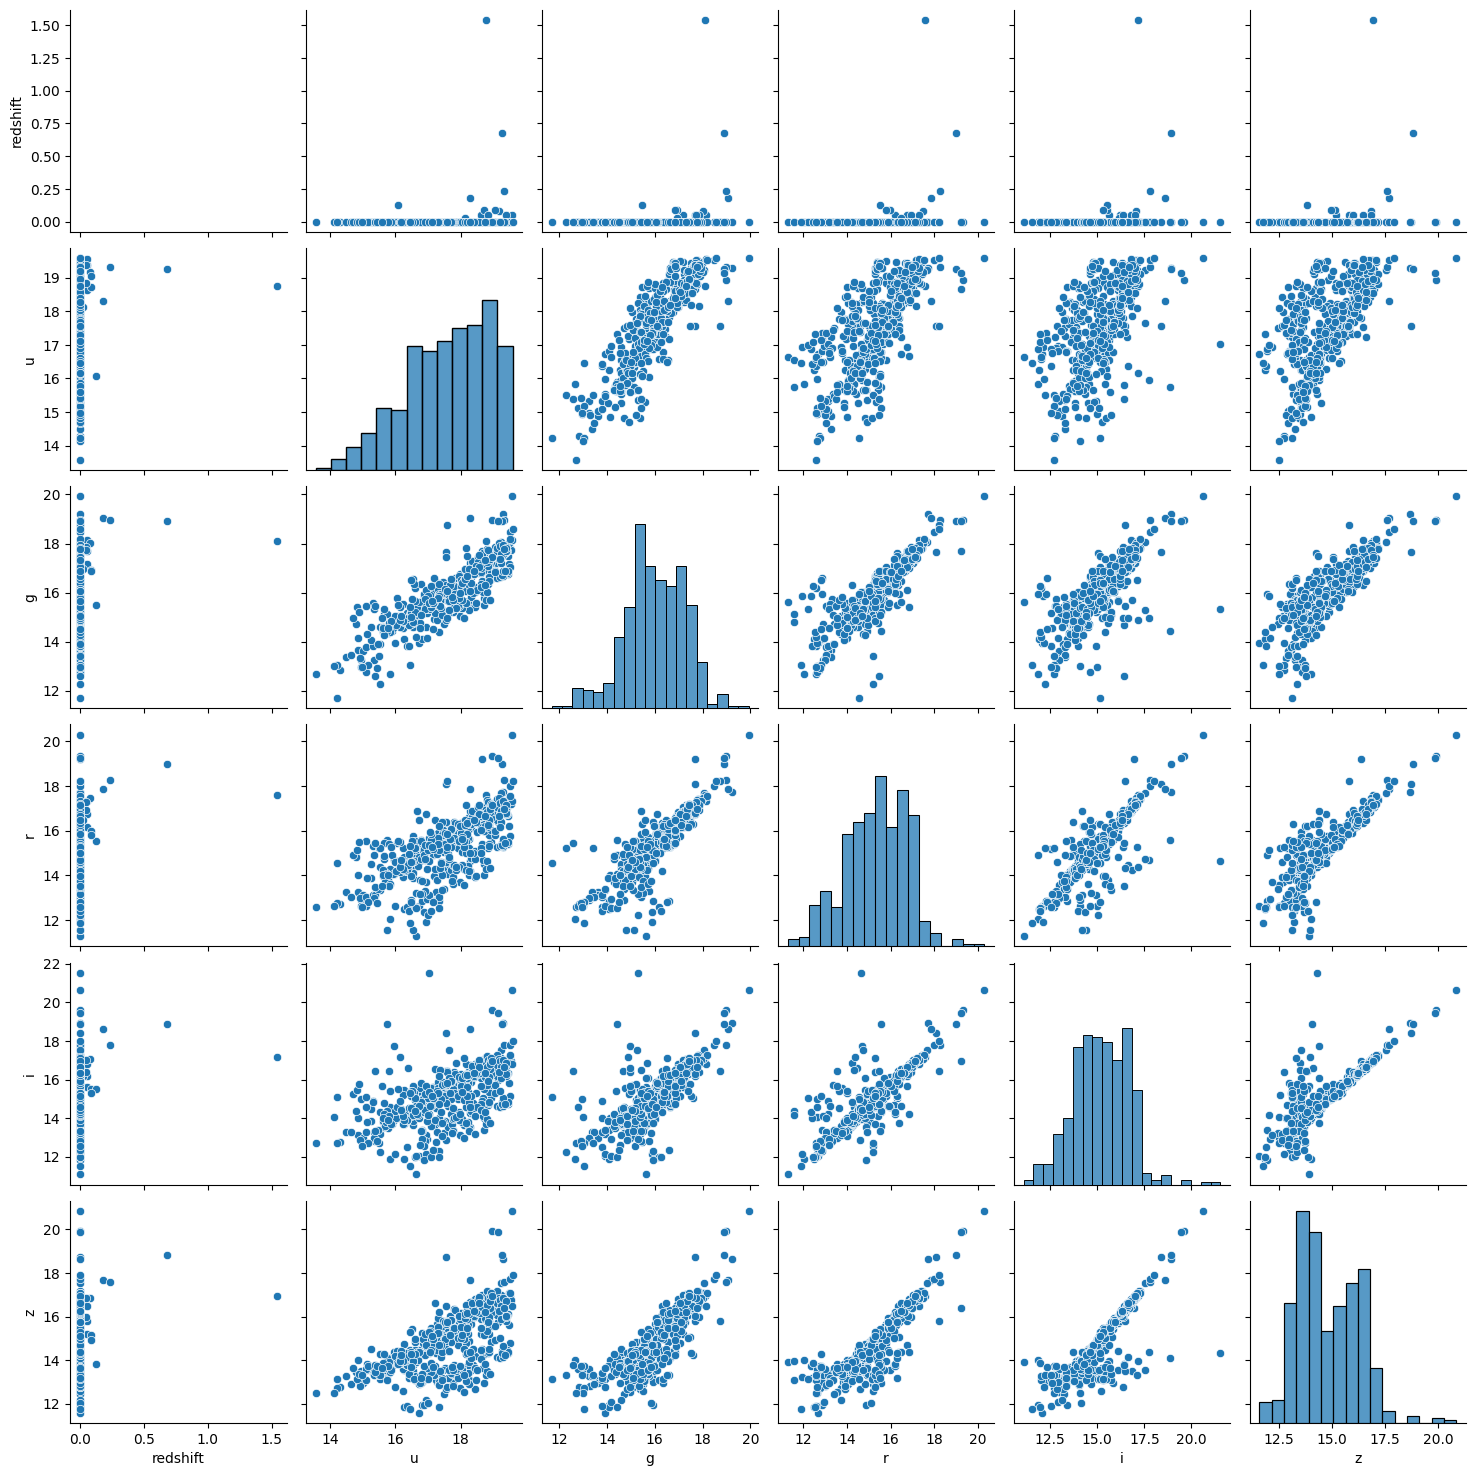

In [24]:
# Pairplot to explore the relationship of redshift with other magnitudes
sns.pairplot(dataframe[['redshift', 'u', 'g', 'r', 'i', 'z']])
plt.show()


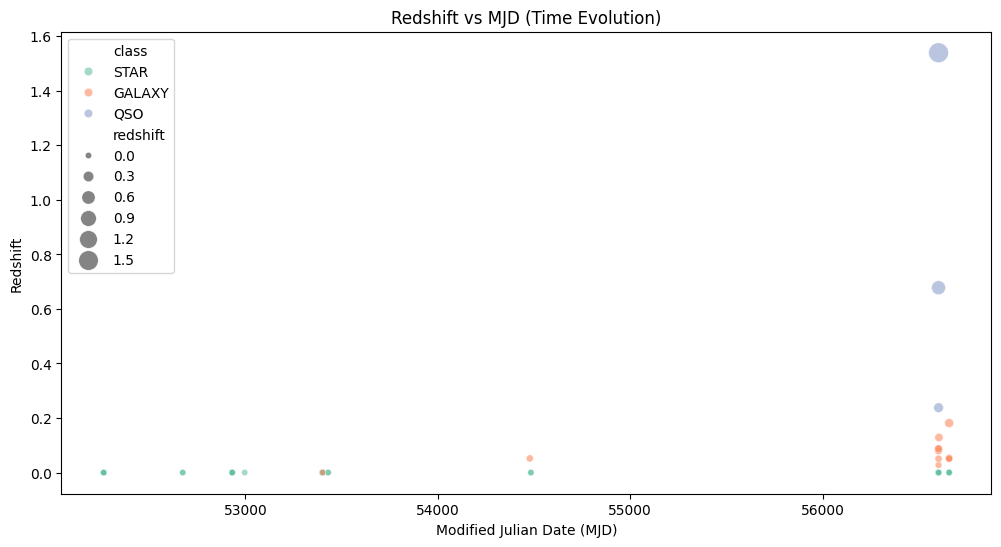

In [25]:
# Plot redshift over time (MJD)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dataframe, x='mjd', y='redshift', hue='class', palette='Set2', size='redshift', sizes=(20, 200), alpha=0.6)
plt.title('Redshift vs MJD (Time Evolution)')
plt.xlabel('Modified Julian Date (MJD)')
plt.ylabel('Redshift')
plt.show()


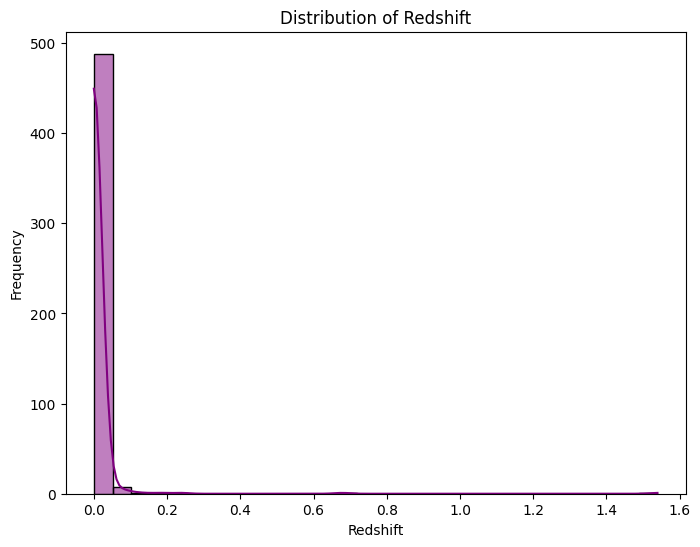

In [26]:
# Plot the distribution of redshift values
plt.figure(figsize=(8, 6))
sns.histplot(dataframe['redshift'], kde=True, bins=30, color='purple')
plt.title('Distribution of Redshift')
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.show()


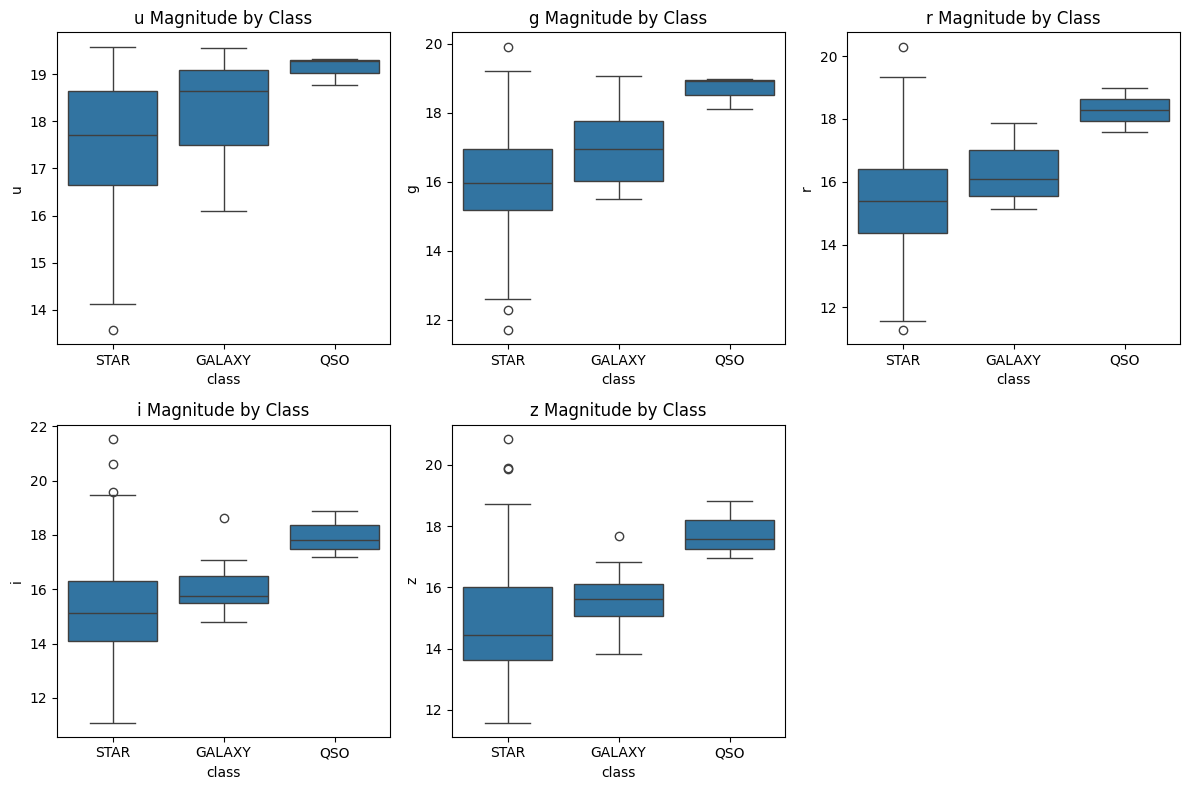

In [27]:
# Plot the distribution of magnitudes for each class
magnitude_columns = ['u', 'g', 'r', 'i', 'z']
plt.figure(figsize=(12, 8))
for i, col in enumerate(magnitude_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=dataframe, x='class', y=col)
    plt.title(f'{col} Magnitude by Class')
plt.tight_layout()
plt.show()


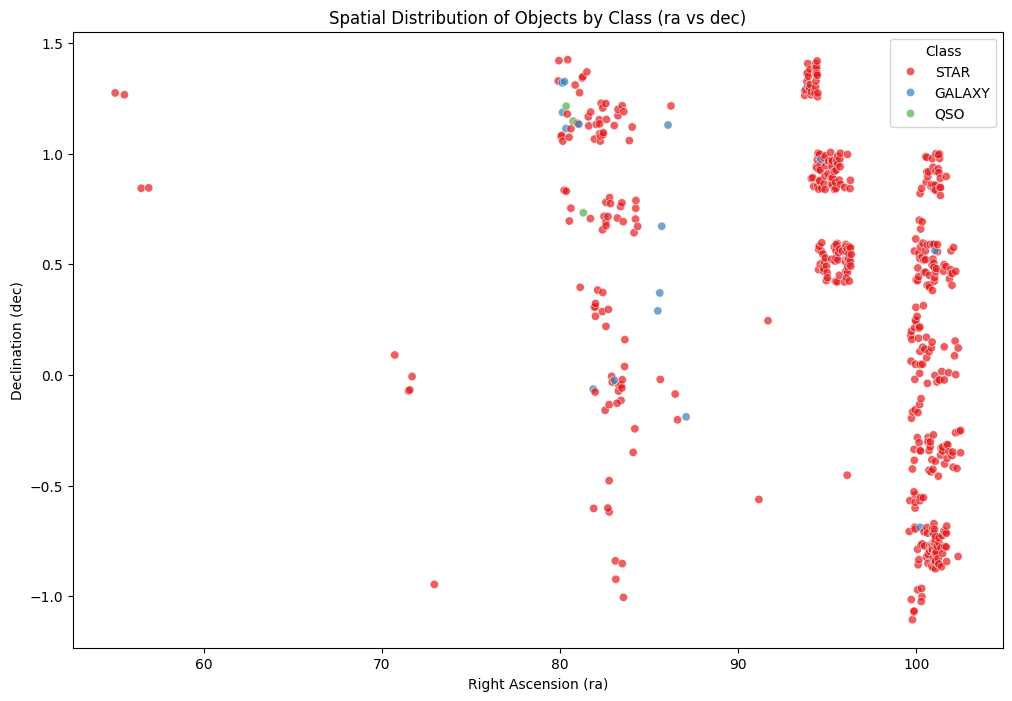

In [28]:
# Scatter plot of ra vs dec for each class
plt.figure(figsize=(12, 8))
sns.scatterplot(data=dataframe, x='ra', y='dec', hue='class', palette='Set1', alpha=0.7)
plt.title('Spatial Distribution of Objects by Class (ra vs dec)')
plt.xlabel('Right Ascension (ra)')
plt.ylabel('Declination (dec)')
plt.legend(title='Class')
plt.show()


<ipython-input-29-67092c3e1364>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x='class', y='redshift', palette='Set1')


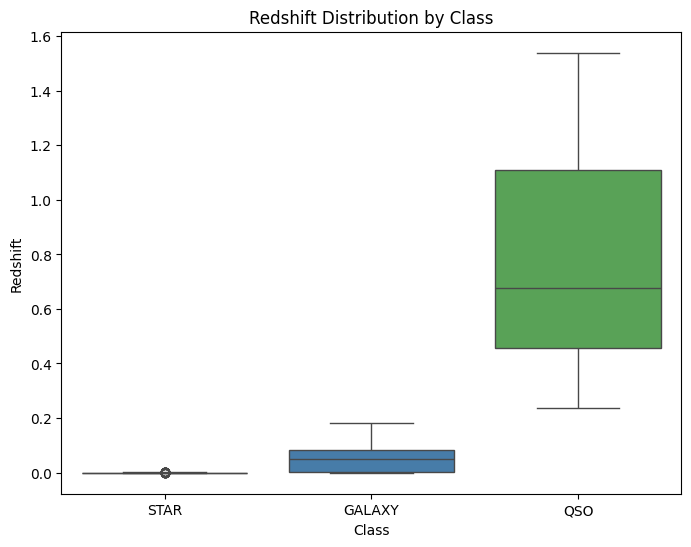

In [29]:
# Boxplot of redshift by class
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataframe, x='class', y='redshift', palette='Set1')
plt.title('Redshift Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Redshift')
plt.show()


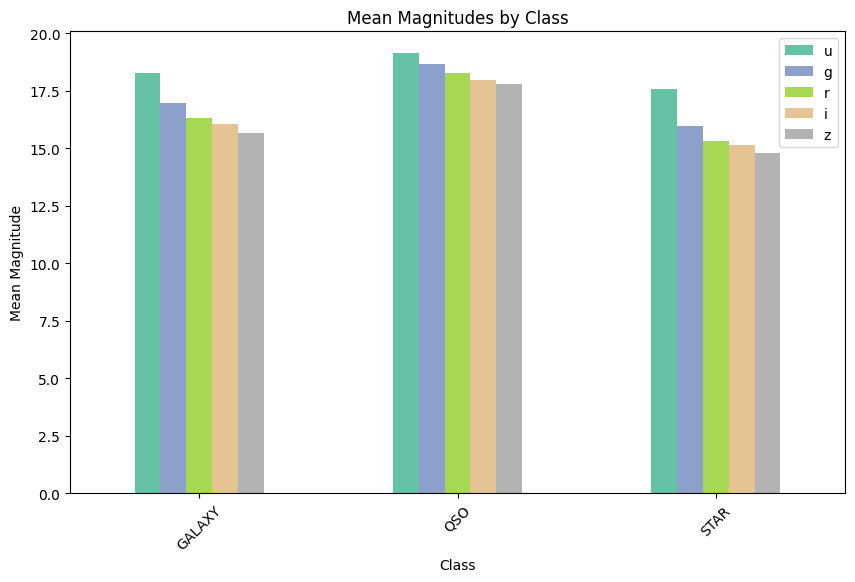

In [30]:
# Calculate mean magnitude by class for each band
mean_magnitudes = dataframe.groupby('class')[['u', 'g', 'r', 'i', 'z']].mean()

# Plot the mean magnitudes
mean_magnitudes.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Mean Magnitudes by Class')
plt.xlabel('Class')
plt.ylabel('Mean Magnitude')
plt.xticks(rotation=45)
plt.show()


In [31]:
# Filter high redshift objects
high_redshift = dataframe[dataframe['redshift'] > 1.0]

# Display some characteristics of high redshift objects
print(high_redshift[['objid', 'ra', 'dec', 'class', 'redshift']].head())


            objid         ra       dec class  redshift
176  1.237650e+18  80.335584  1.214414   QSO  1.539758


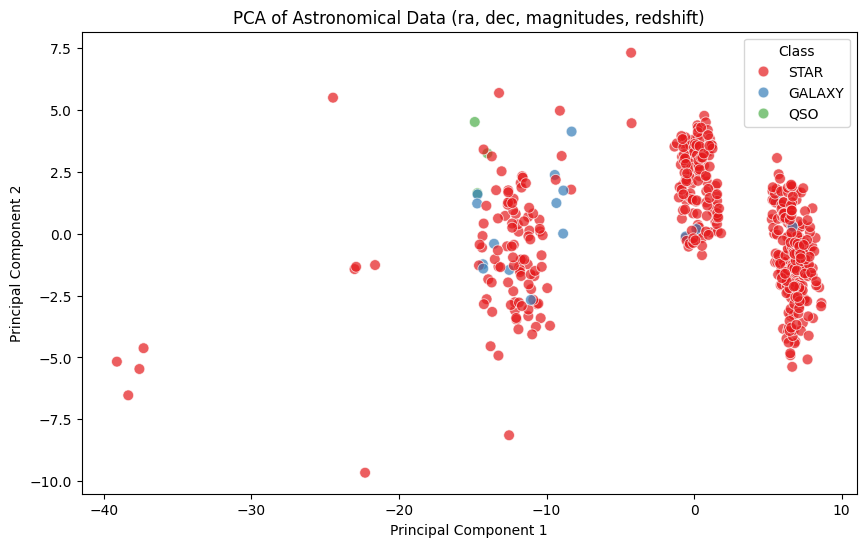

In [32]:
from sklearn.decomposition import PCA

# Select the numeric features for PCA
pca_features = dataframe[['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']]

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(pca_features)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Visualize PCA results with class labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=dataframe['class'], palette='Set1', s=60, alpha=0.7)
plt.title('PCA of Astronomical Data (ra, dec, magnitudes, redshift)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.show()


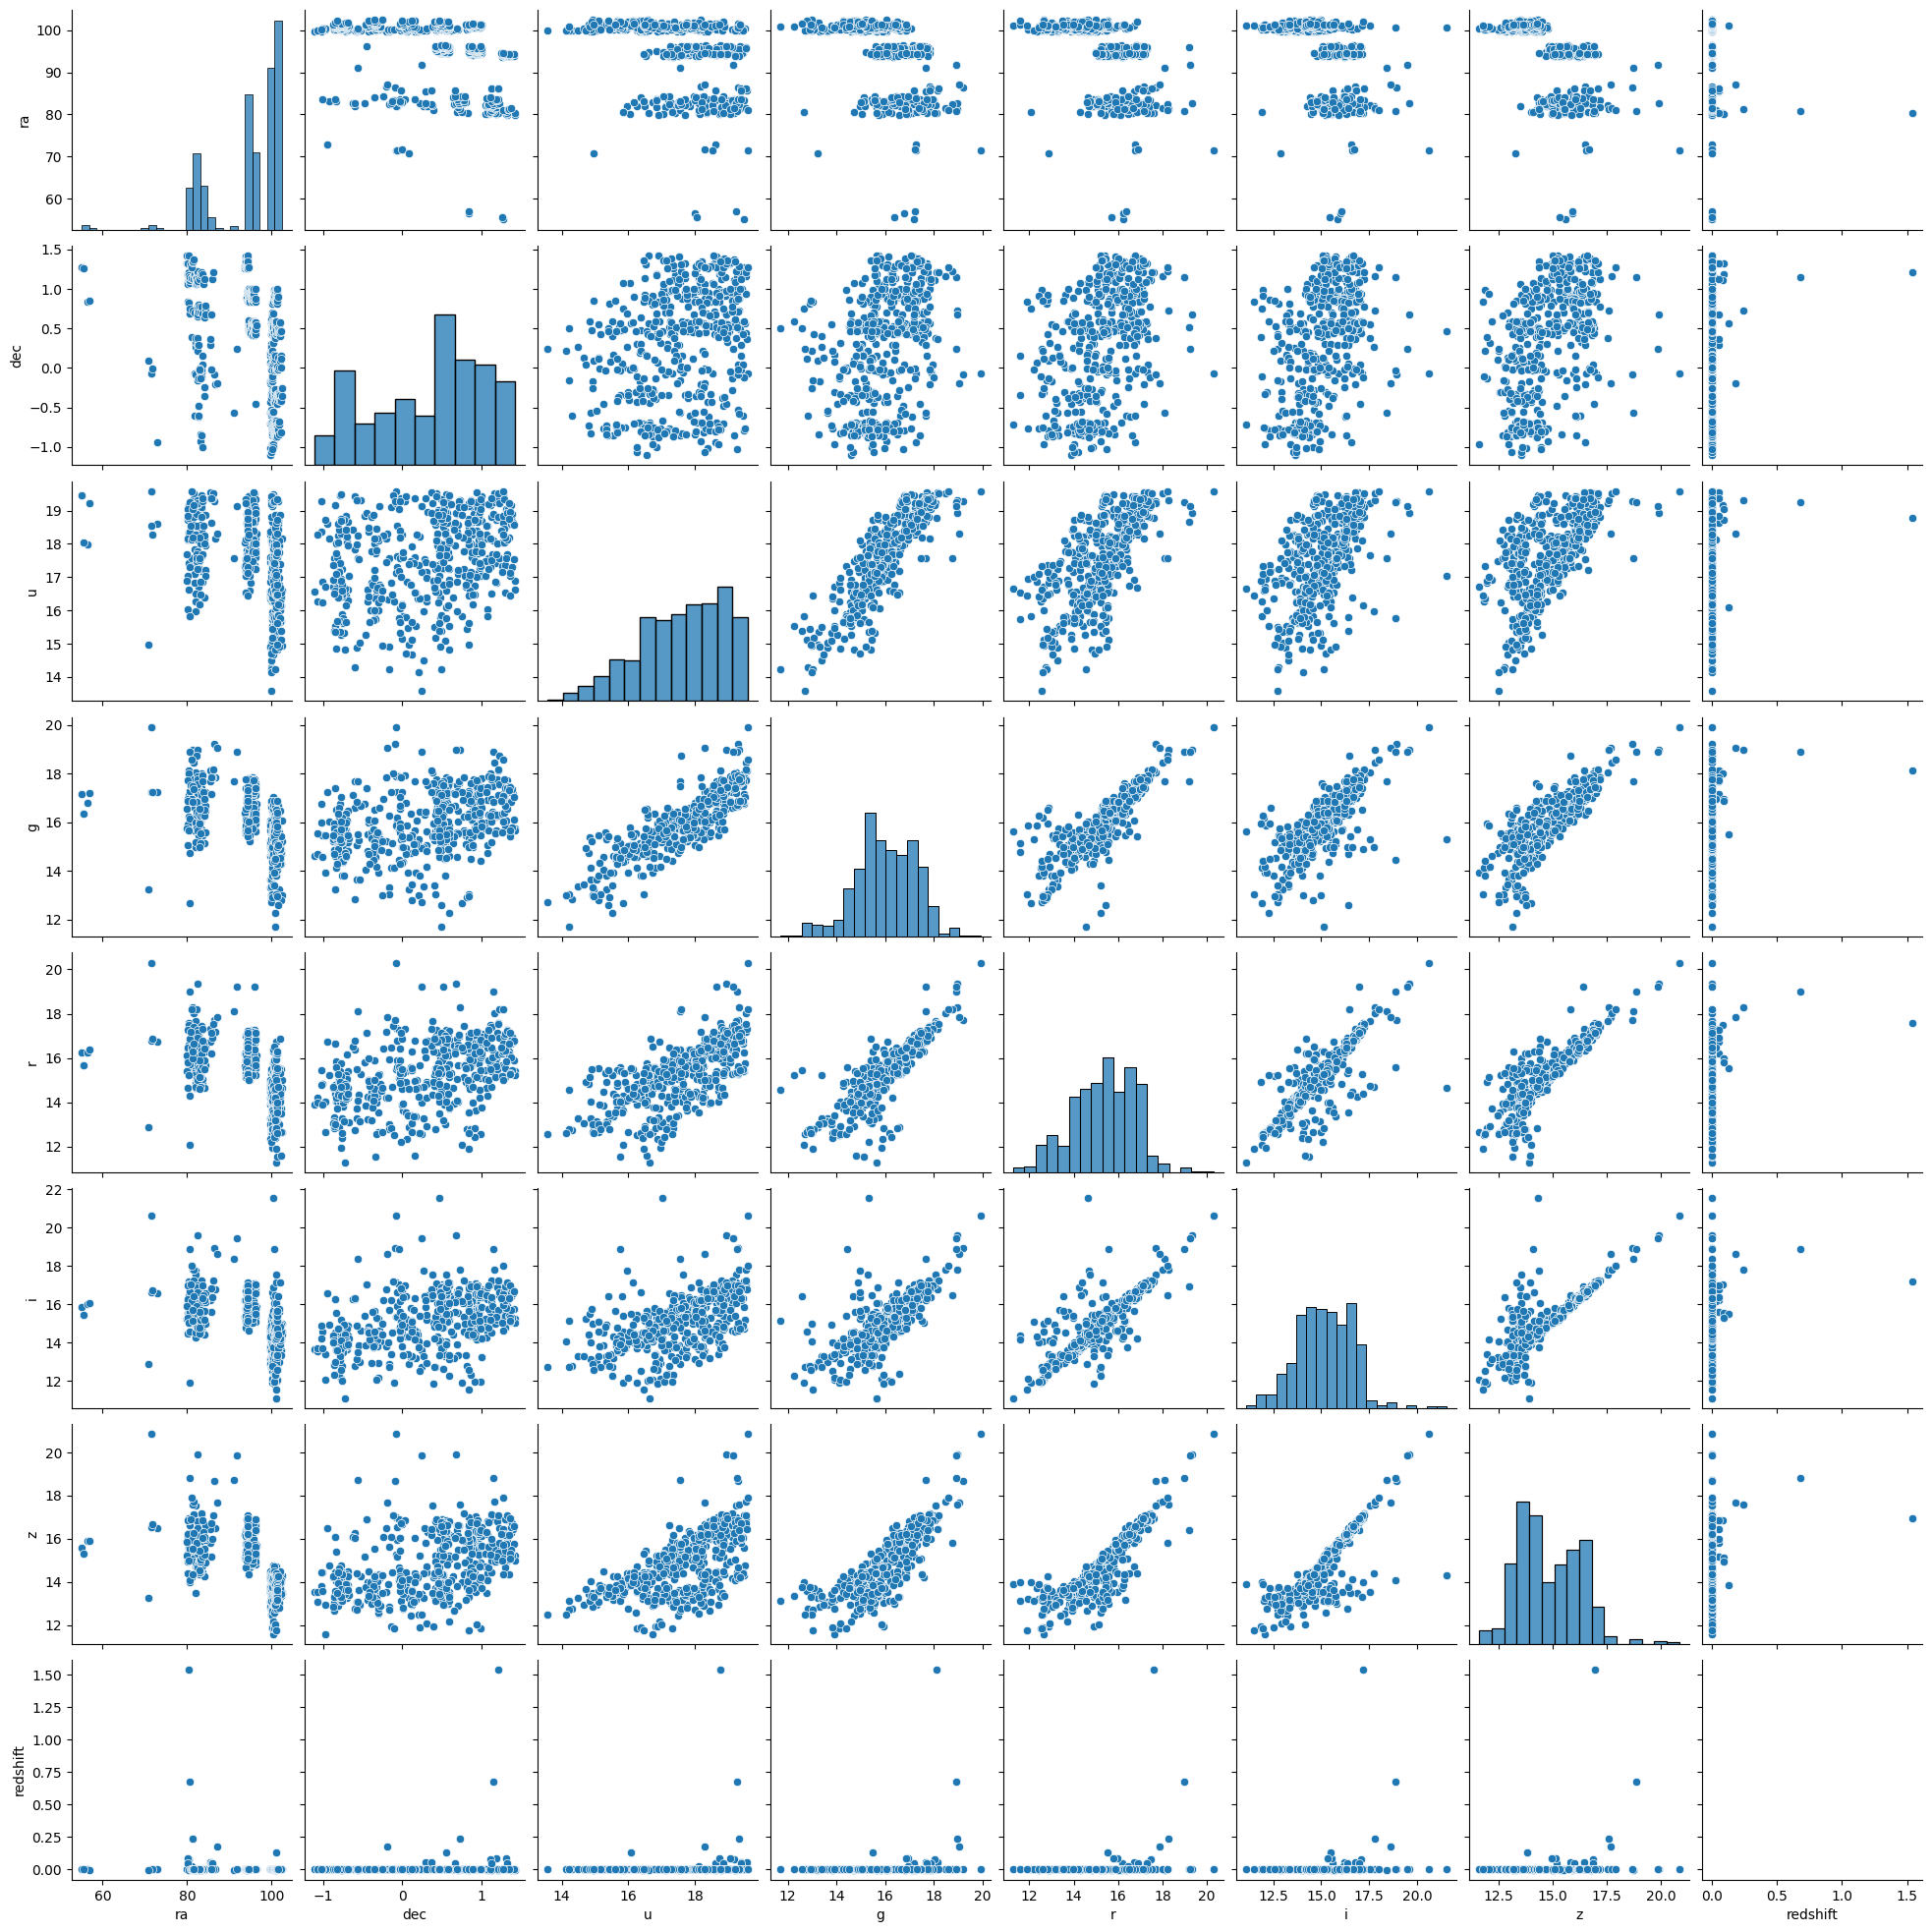

In [33]:
# Scatterplot matrix (pairplot) for ra, dec, and other features
sns.pairplot(dataframe[['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']])
plt.show()


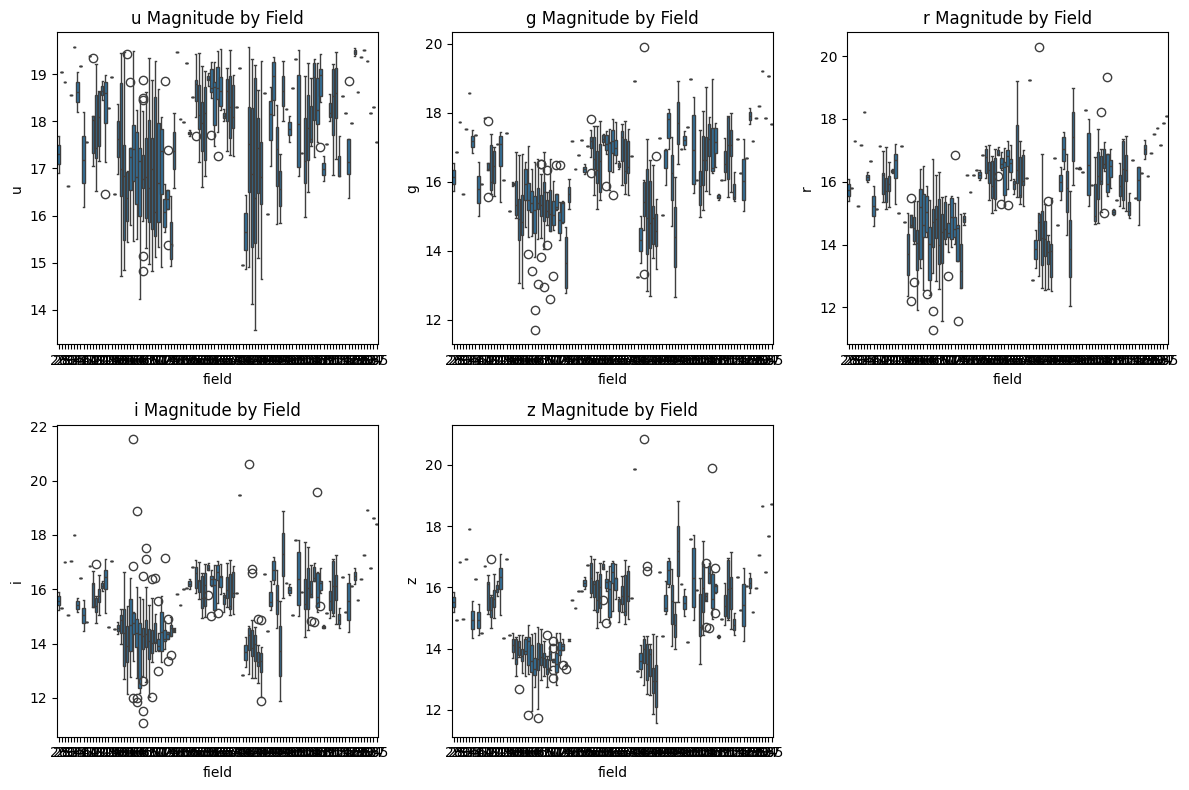

In [34]:
# Boxplot of magnitudes by field
plt.figure(figsize=(12, 8))
for i, col in enumerate(magnitude_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=dataframe, x='field', y=col)
    plt.title(f'{col} Magnitude by Field')
plt.tight_layout()
plt.show()


In [35]:
# Check for unrealistic values in magnitude columns
unrealistic_values = dataframe[(dataframe['u'] < 0) | (dataframe['g'] < 0) | (dataframe['r'] < 0) |
                               (dataframe['i'] < 0) | (dataframe['z'] < 0) | (dataframe['redshift'] < 0)]
print(unrealistic_values[['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']])


            objid         ra       dec         u         g         r  \
47   1.237650e+18  96.234898  0.423976  17.25586  15.61591  15.23917   
48   1.237650e+18  96.290404  0.514425  18.98555  17.53560  16.88702   
51   1.237650e+18  96.346363  0.544493  18.30842  16.74553  16.13087   
106  1.237650e+18  55.021616  1.274501  19.47332  17.17348  16.22887   
116  1.237650e+18  91.154400 -0.562836  17.55912  17.66917  18.09343   
..            ...        ...       ...       ...       ...       ...   
467  1.237650e+18  81.241230  1.341739  19.04549  16.83736  15.97689   
469  1.237650e+18  81.501528  1.369517  19.17474  17.36538  16.65999   
471  1.237650e+18  93.742685  1.285125  18.03653  16.37722  15.61594   
480  1.237650e+18  93.930455  1.349873  19.21443  17.38277  16.17280   
481  1.237650e+18  94.028708  1.381364  18.61980  16.83763  16.01165   

            i         z  redshift  
47   15.08549  14.96183 -0.000007  
48   16.57191  16.35599 -0.000031  
51   15.86162  15.67015 -0.

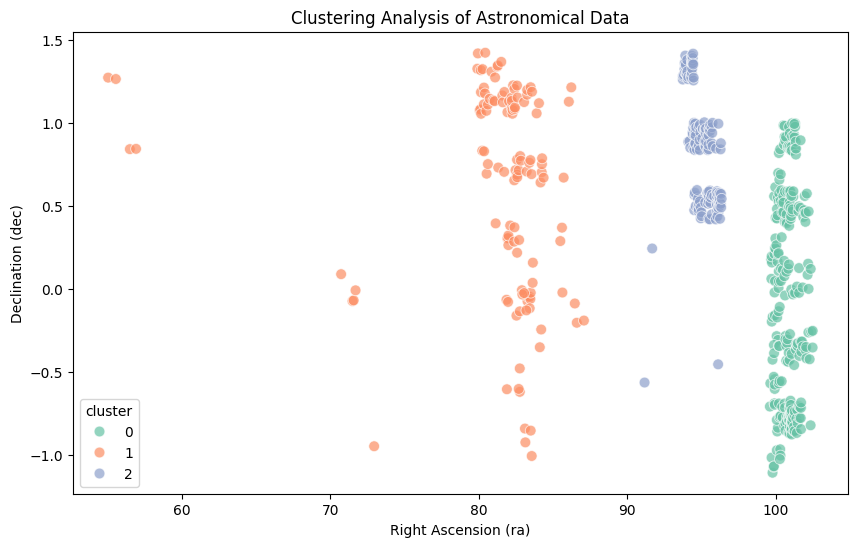

In [36]:
from sklearn.cluster import KMeans

# Select features for clustering
clustering_features = dataframe[['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)
dataframe['cluster'] = kmeans.fit_predict(clustering_features)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x='ra', y='dec', hue='cluster', palette='Set2', s=60, alpha=0.7)
plt.title('Clustering Analysis of Astronomical Data')
plt.xlabel('Right Ascension (ra)')
plt.ylabel('Declination (dec)')
plt.show()


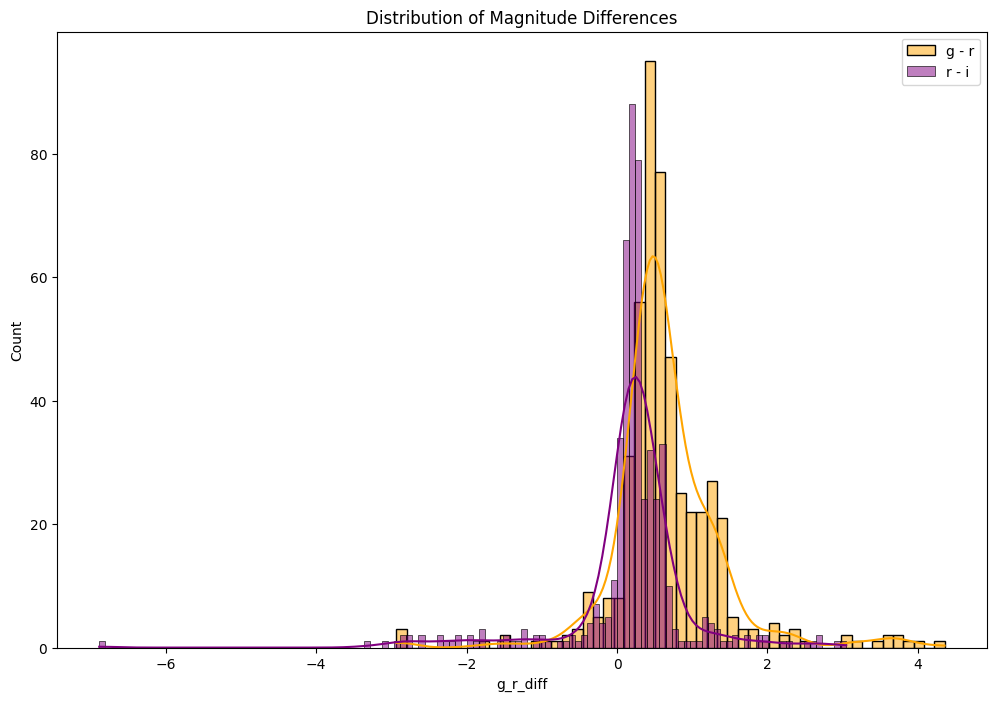

In [37]:
# Create new feature: magnitude difference between different bands
dataframe['g_r_diff'] = dataframe['g'] - dataframe['r']
dataframe['r_i_diff'] = dataframe['r'] - dataframe['i']

# Visualize the distribution of these new features
plt.figure(figsize=(12, 8))
sns.histplot(dataframe['g_r_diff'], kde=True, color='orange', label='g - r')
sns.histplot(dataframe['r_i_diff'], kde=True, color='purple', label='r - i')
plt.legend()
plt.title('Distribution of Magnitude Differences')
plt.show()


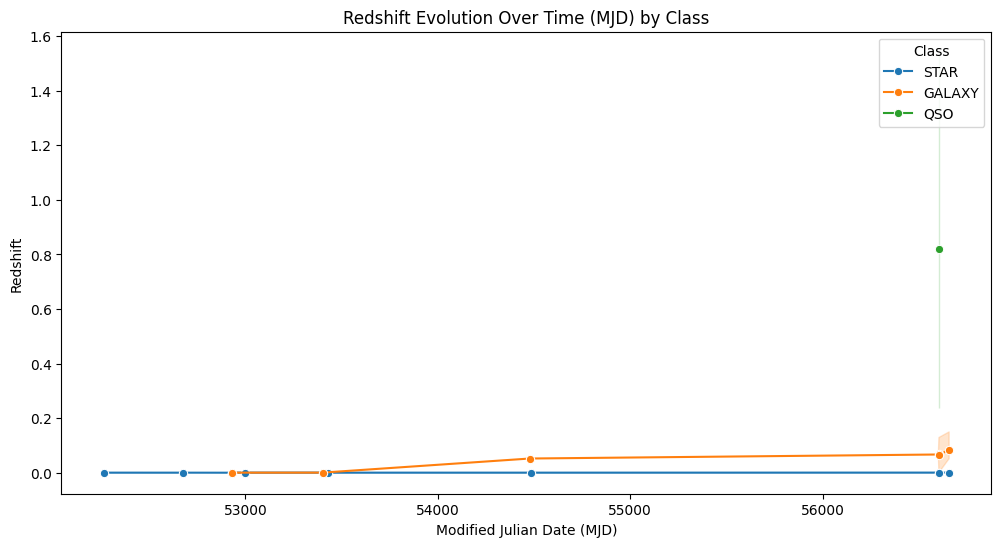

In [38]:
# Plot redshift over time (MJD) for different classes
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataframe, x='mjd', y='redshift', hue='class', marker='o', dashes=False)
plt.title('Redshift Evolution Over Time (MJD) by Class')
plt.xlabel('Modified Julian Date (MJD)')
plt.ylabel('Redshift')
plt.legend(title='Class')
plt.show()


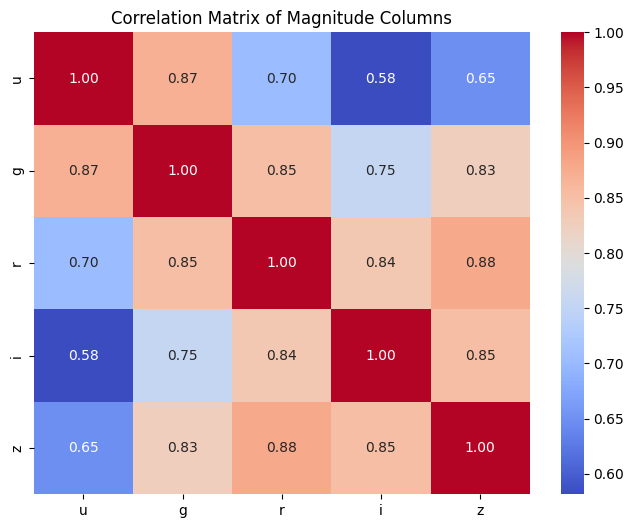

In [39]:
# Calculate pairwise correlation of magnitude columns
magnitude_columns = ['u', 'g', 'r', 'i', 'z']
correlation_magnitudes = dataframe[magnitude_columns].corr()

# Plot a heatmap of the pairwise correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_magnitudes, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Magnitude Columns')
plt.show()


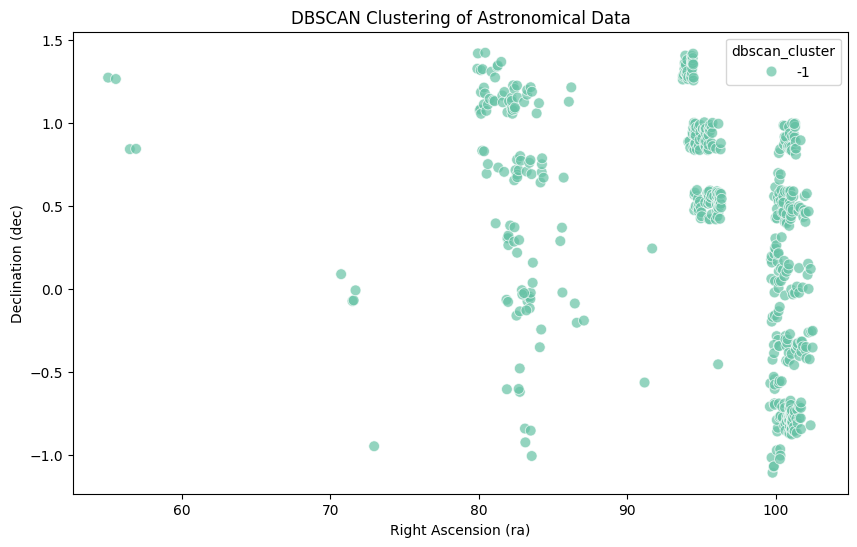

In [40]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering (density-based)
dbscan = DBSCAN(eps=0.3, min_samples=10)
dataframe['dbscan_cluster'] = dbscan.fit_predict(clustering_features)

# Plot the DBSCAN clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x='ra', y='dec', hue='dbscan_cluster', palette='Set2', s=60, alpha=0.7)
plt.title('DBSCAN Clustering of Astronomical Data')
plt.xlabel('Right Ascension (ra)')
plt.ylabel('Declination (dec)')
plt.show()


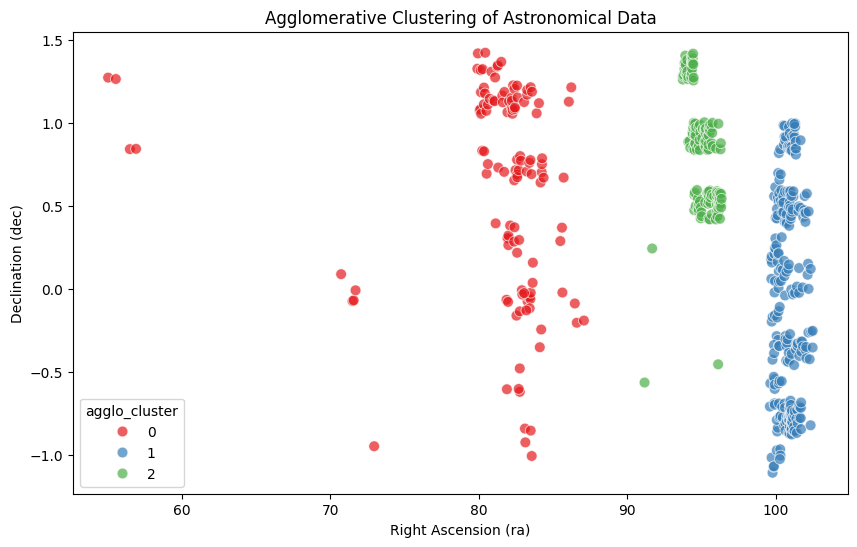

In [41]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
dataframe['agglo_cluster'] = agglo.fit_predict(clustering_features)

# Plot the Agglomerative Clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x='ra', y='dec', hue='agglo_cluster', palette='Set1', s=60, alpha=0.7)
plt.title('Agglomerative Clustering of Astronomical Data')
plt.xlabel('Right Ascension (ra)')
plt.ylabel('Declination (dec)')
plt.show()


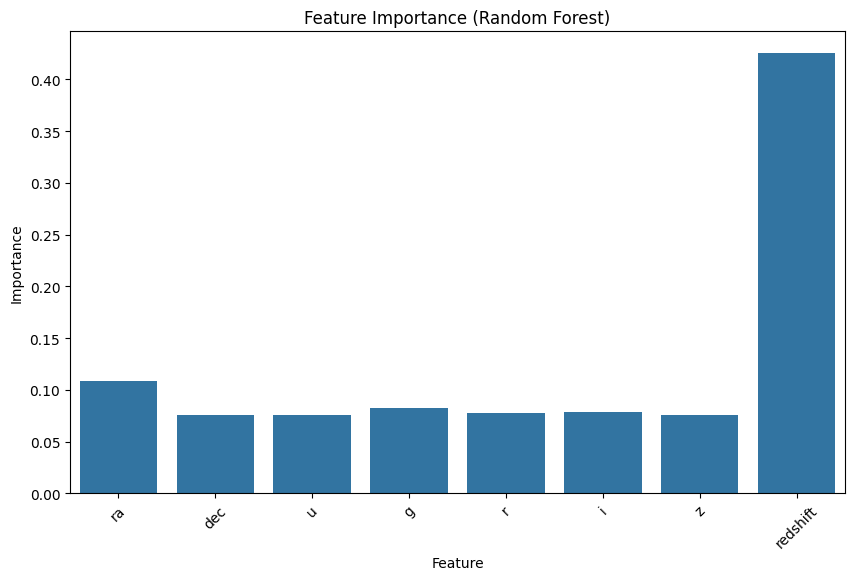

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Prepare features and target
X = dataframe[['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']]
y = dataframe['class']

# Train a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Plot feature importance
feature_importance = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


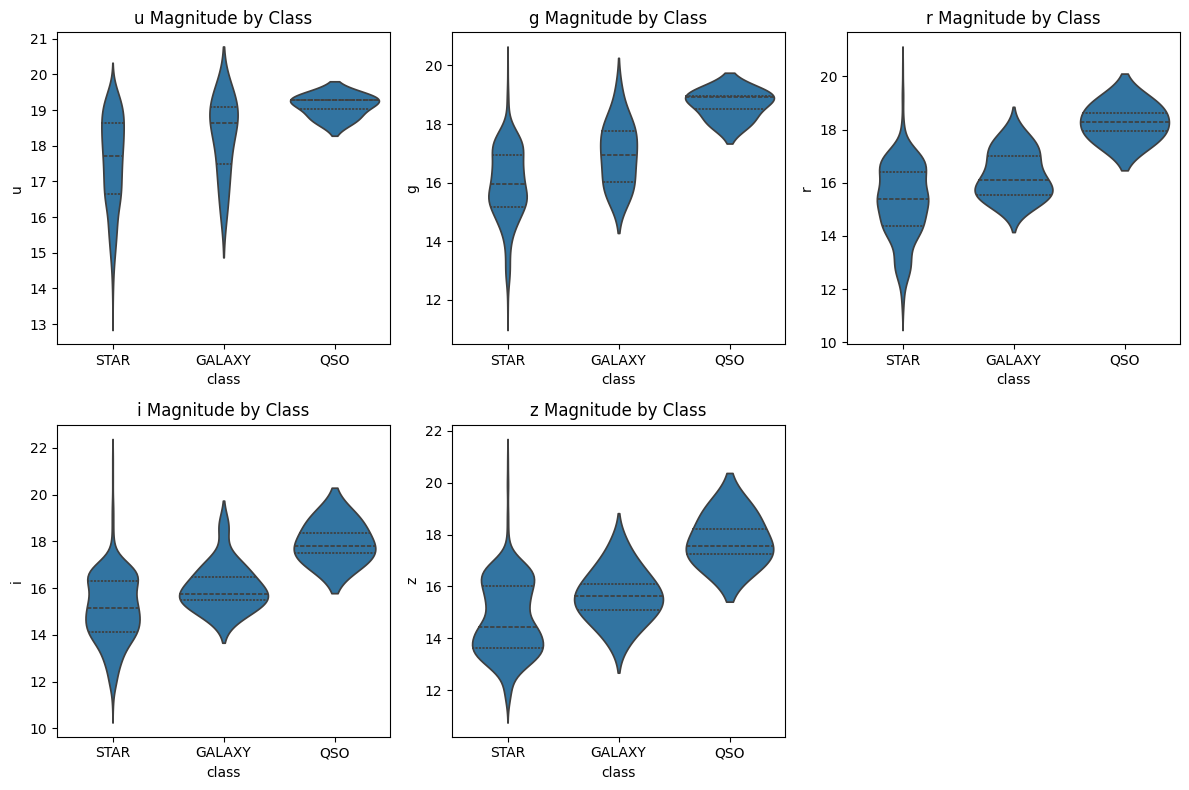

In [43]:
# Violin plots for magnitudes by class
plt.figure(figsize=(12, 8))
for i, col in enumerate(magnitude_columns, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(data=dataframe, x='class', y=col, inner='quart')
    plt.title(f'{col} Magnitude by Class')
plt.tight_layout()
plt.show()


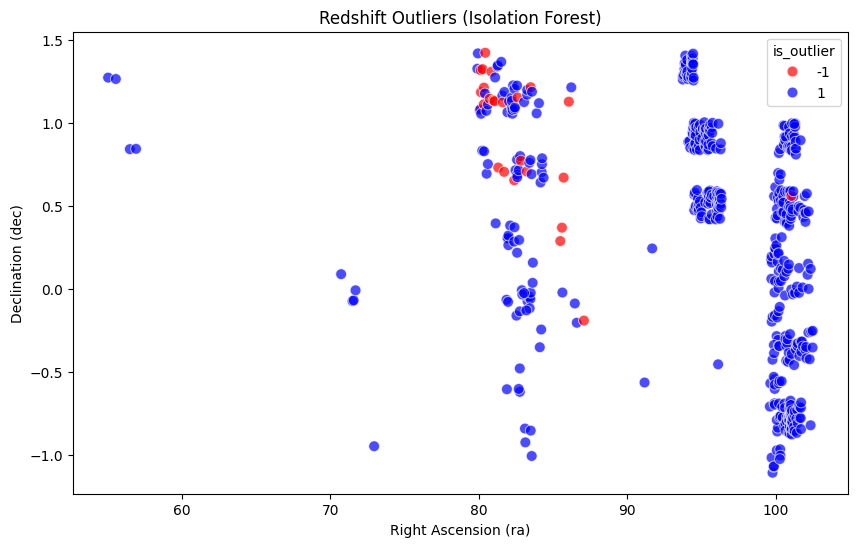

            objid          ra       dec  redshift
132  1.237650e+18   87.070526 -0.189387  0.181586
143  1.237650e+18   85.480806  0.289600  0.053188
144  1.237650e+18   85.592021  0.370440  0.053018
151  1.237650e+18   81.299953  0.732651  0.237931
152  1.237650e+18   81.696968  0.706731 -0.000384
153  1.237650e+18   82.377615  0.655806  0.000831
160  1.237650e+18   82.824267  0.774301  0.000631
161  1.237650e+18   83.211171  0.708940  0.001234
170  1.237650e+18   85.703074  0.672031  0.051846
172  1.237650e+18   80.048167  1.076806  0.001032
175  1.237650e+18   80.135126  1.186679  0.087043
176  1.237650e+18   80.335584  1.214414  1.539758
177  1.237650e+18   80.328437  1.113563  0.079787
181  1.237650e+18   80.725024  1.147144  0.677912
182  1.237650e+18   80.975443  1.136899  0.000562
183  1.237650e+18   81.051790  1.132772  0.027602
185  1.237650e+18   81.607394  1.125552  0.000983
198  1.237650e+18   82.599412  1.154409  0.001114
203  1.237650e+18   83.481751  1.216621 -0.000592


In [44]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest to detect outliers based on redshift
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(dataframe[['redshift']])

# Add outlier flag to dataframe
dataframe['is_outlier'] = outliers
outliers_data = dataframe[dataframe['is_outlier'] == -1]

# Plot outliers in redshift
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x='ra', y='dec', hue='is_outlier', palette={-1: 'red', 1: 'blue'}, s=60, alpha=0.7)
plt.title('Redshift Outliers (Isolation Forest)')
plt.xlabel('Right Ascension (ra)')
plt.ylabel('Declination (dec)')
plt.show()

# Show outliers
print(outliers_data[['objid', 'ra', 'dec', 'redshift']])
